# SLU10 - Classification: Learning notebook

In this notebook we will cover the following: 

    - What classification is for
    - Logistic regression
    - Cost function (concept)
    - Binary classification
    - Multiclass classification
    - Sklearn logit

Some quick imports to get us started:

In [1]:
import pandas as pd 
import numpy as np
# The following is to make some plots along the way 

# Some quick utilts to avoid filling this notebook with support code 
from utils import get_data_iris, plot_pair_plots, super_simple_classifier_plot, linear_separation_plot, predict_probability_point, gradient_descent_classification_plot, plot_cross_entropy, OvR_plot, multinomial_plot, OvR_vs_multinomial_plot
% matplotlib inline

# A Quick Introduction

So, you just learned about Regression. Now let's tackle a different problem, Classification! You could be asking yourself the following.
> _What is Classification and what are its uses?_

In a nutshell, Classification attempts to predict, for each individual in a population, to which class each individual belongs to. By being able to accurately classify an individual without knowing his class, will allow for us to take specific actions towards that same individual. These actions mostly aim to optimize a certain aspect. For instance, an insurance company would like to predict whether a client will churn. If a client is classified as prone to churn, then the company could offer that same client some exclusive discounts or services. Thus, minimizing the client's odds of actually churning.

The concept behind Classification is very trivial, but how to perform accurate and generalizable classifications can get quite complex. There are a lot of different algorithms and approaches for this task, however in this learning unit we will look at the most simple (but super useful) algorithm and introduce some cool new concepts along the way.

For this notebook, we will use the tiny and famous Iris database:

<img src="https://kasperfred.com/media/posts/creating-your-first-machine-learning-classification-model-in-sklearn/cover2_Zz8UOwj.jpg" style="width: 400px;"/>

In [2]:
X, Y = get_data_iris()
print(X.shape)
X.head()

(150, 4)


,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
Y.head()

,SPECIES
0,0
1,0
2,0
3,0
4,0


The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. Thus, in this case, a Classification problem would be to classify each iris' species taking into account their sepal and petal length and sepal and petal width. It can be described as follows:

1. **SEPAL_LENGTH**: sepal length in cm 
2. **SEPAL_WIDTH**:  sepal width in cm 
3. **PETAL_LENGTH**: petal length in cm 
4. **PETAL_WIDTH**:  petal width in cm 
5. **SPECIES**: 
    * Iris Setosa 
    * Iris Versicolour 
    * Iris Virginica

Before we go any further, let's get a visual intuition of our data.

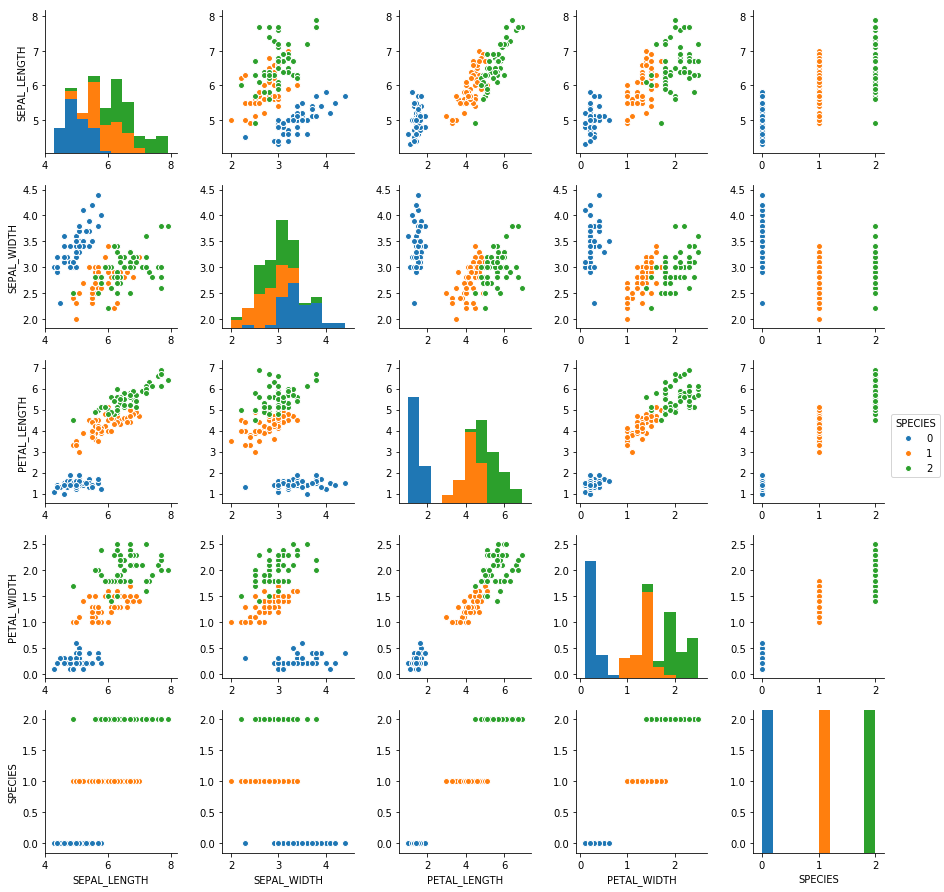

In [4]:
plot_pair_plots(X,Y)

Basically, we made a plot for each pairwise feature relationship and distinguished each iris species through color. As you can see, it is actually very useful to look at data visualizations in classification problems. We can by visual inspection easily see that the Species 0 is quite different from the other two species, which makes it very easy to classify. However, the same cannot be said from the species 1 and 2 as they overlap in some feature relationships.

Now, we could easily make very complex classification that separates the Species 0 from the other two species by making a separating line where $PETAL\_WIDTH = 0.8$. We will mark all Species 0 iris with the number 0 and the other two as 1. Let's see how the sepal length by petal width plot would look like.

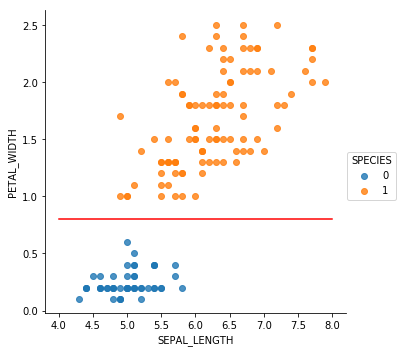

In [5]:
super_simple_classifier_plot(X, Y)

Awesome, we just observed a very simple classification approach! However, this would not work as well to separate the other two species. And besides, this took a lot of work and it would be great if we could build and use an algorithm that automatically detects the separation lines, like the one we just did, automatically! That is where Logistic Regression comes in!

<img src="https://memegenerator.net/img/instances/73789366/nobody-expects-the-logistic-regression.jpg" style="width: 400px;"/>

# Logistic Regression

Unlike actual regression, logistic regression does predict the value of a numeric variable given a set of input variables. Instead, the output is a probability that the given observation belongs to a certain class (in this case, iris species). For simplicity, we will assume that we have only two classes (Species 0 and 1), and the probability in question is $P_1$ -> the probability that a certain observation belongs to the $1$ species class. Ofcourse that $P_0$ = 1 - $P_1$. Thus, the output of Logistic Regression always lies in [0, 1].

Logistic Regression assumes that our observation space can be linearly separated into two "regions", one for each class. This linear separation is a simple straight line (no curving!!) for two-dimensional spaces (just like we did above). For three-dimensional spaces it's a plane, and so on. These lines or planes will be decided by our data and the learning algorithm. However, for this separation to make any sense, the observations must be separable by a linear boundary. When observations satisfy this constraint, they are said to be linearly separable, just as classifying between species 0 and 1 or species 0 and 2.

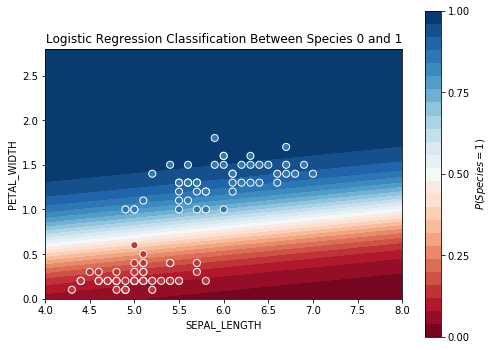

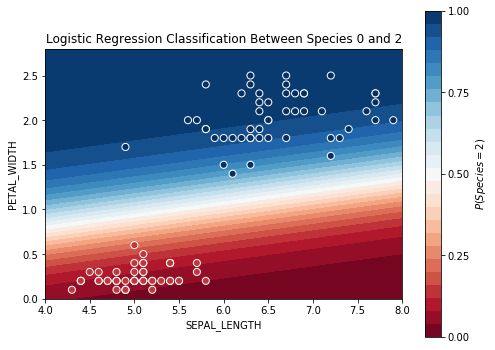

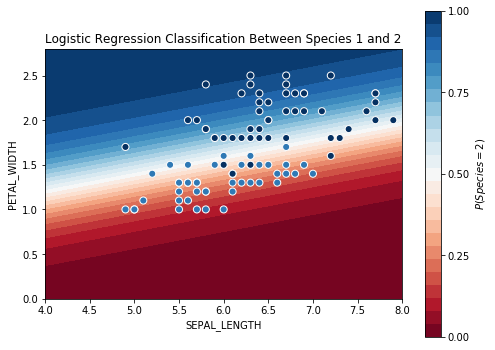

In [6]:
linear_separation_plot(X, Y)

BUT the same cannot be said when classifying between species 1 and 2, as they seem to overlap. In such cases, what can be done is to transform the variables into higher dimensions or use a non-linear classification algorithm (which logistic regression is not). But now we're diverging.

You should be asking yourself the following:

> _But how does Logistic Regression use this linear boundary to quantify the probability of a data point belonging to a certain class?_

Well...
<img src="https://memegenerator.net/img/instances/22032391/its-magic.jpg" style="width: 400px;"/>



Not really, once the model is trained, the boundary function is quite simple! Let $x_1$ and $x_2$ be two variables, such as $SEPAL\_LENGTH$ and $PETAL\_WIDTH$ as we've been using until now. Also, let $\hat{p}$ be the probability of an event or class. It should be noted again that Logistic Regression can only classify between two classes at a time, a positive class $+$ and negative class $-$. For example, the $-$ and $+$ classes could represent species 0 or 1, respectively. The resulting function is as follows:

$$ln\left ( \frac{\hat{p}}{1-\hat{p}} \right ) = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$

Consider a point $(a, b)$. Inputing the values of  $x_1$ and $x_2$ into the boundary function, we will get its output $\beta_0 + \beta_1 a + \beta_2 b$. Now depending on the location of $(a, b)$, there are three possibilities to consider:

* $(a, b)$ lies in the region defined by points of the $+$ class. As a result, $\beta_0 + \beta_1 a + \beta_2 b$ will be positive, lying somewhere in $(0, \infty)$. Mathematically, the higher the magnitude of this value, the greater is the distance between the point and the boundary. Intuitively speaking, the greater is the probability that $(a, b)$ belongs to the $+$ class. Therefore, $\hat{p}$ will lie in $(0.5, 1]$. Let's try this out for a classification task with Logistic Regression between species 0 and 1 with variables $SEPAL\_LENGTH$ and $PETAL\_WIDTH$. By observation, we'll choose point $(5,1)$, but you can change it to another one!

In [7]:
predict_probability_point(X, Y, (5,1))

The probability of point (5.0,1.0) belonging to Species 1 is 0.79


* $(a, b)$ lies in the region defined by points of the $-$ class. Now, $\beta_0 + \beta_1 a + \beta_2 b$ will be negative, lying in $(-\infty, 0)$. But like in the positive case, higher the absolute value of the function output, greater the probability that $(a, b)$ belongs to the $-$ class. $\hat{p}$ will now lie in $[0, 0.5)$. Let's choose such a point for the same classification task as before! By observation, we'll choose point $(5,0.2)$, but you can change it to another one!

In [8]:
predict_probability_point(X, Y, (5,0.2))

The probability of point (5.0,0.2) belonging to Species 1 is 0.10


* $(a, b)$ lies ON the decision boundary. In this case, $\beta_0 + \beta_1 a + \beta_2 b = 0$. This means that our model cannot really say whether $(a, b)$ belongs to the $+$ or $-$ class. As a result, $\hat{p}$ will be exactly $0.5$. Such a point would be $(5,0.7)$.

In [9]:
predict_probability_point(X, Y, (5,0.7))

The probability of point (5.0,0.7) belonging to Species 1 is 0.50


<img src="https://i.imgflip.com/286p5c.jpg" style="width: 400px;"/>

We did not talk about the $ln\left ( \frac{\hat{p}}{1-\hat{p}} \right )$ part of the function, so let's do it! As we've seen, the $\beta_0 + \beta_1 x_1 + \beta_2 x_2$ can output any value between $(-\infty, \infty)$, but we are looking for probabilities, right? That is why we use the left side of the function -- to compress those values between $[0, 1]$. This function can be divided into two parts:

1. The $\frac{\hat{p}}{1-\hat{p}}$ function is called the the $odds \ ratio$ function $OR(X)$, which is essentially the ratio of the probability of an observation belonging to a certain class vs. it not belonging. Probability and odds convey the exact same information, but as $\hat{p}$ ranges $[0, 1]$, $OR(X)$ ranges $(0, \infty)$. However, we are still not quite there yet, since our boundary function gives a value from $(–\infty, \infty)$;
2. There is where the $logarithm$ comes in! We just apply it to $OR(X)$ and we get the $log \ odds$ function. Mathematically, as $OR(X)$ goes from $(0, \infty)$, $ln(OR(X))$ goes from $(–\infty,\infty)$!

That was enough theory. Imagine that we want to classify iris flowers between species 0 and 1 by only using $SEPAL\_LENGTH$ and $PETAL\_WIDTH$ as $x_1$ and $x_2$, respectively. Suppose we already have a logistic regression model trained which coefficients are:

$$\beta_0 = -0.92210397 \\ \beta_1 = -0.4441176 \\ \beta_2 = 4.47663504$$ 

If we want to obtain the probability $\hat{p}$ of a sample $(5,1)$ belonging to class $+$ we do the following.  

* Compute the boundary function $\beta_0 + \beta_1 a + \beta_2 b$ which output we will simply call $z$;

In [10]:
z = -0.92210397 + -0.4441176 * 5 + 4.47663504 * 1
print(z)

1.3339430699999992


* Compute the $odds \ ratio$, through $OR(X) = e^z$;

In [11]:
OR = np.exp(z)
print(OR)

3.7959817384457244


* Compute $\hat{p}$ = $\frac{e^z}{1 + e^z} = \frac{1}{1 + e^{-z}}$, called the $logistic \ function$.

In [12]:
p = OR / (1 + OR)
print(p)

0.791492116831104


This was exactly what the $predict\_probability\_point$ function did for point $(5,1)$ previously!

Now that we understood how to use the logistic regression formula to obtain probabilities, we can now learn how to train the model and obtain the coefficients and intercept. That is where cost functions come in!

# Cost Function

In machine learning, the focus is on learning from data, right? And how can a model learn from data like an individual can learn to play an instrument? Through minimizing a cost function! An aspiring new musician would like to minimize the amount of times he plays out of tune, which would be his cost function. He will learn how to play the instrument correctly through trial and error as well as feedback, thus minimizing his cost function. 

A machine learning model does just the same, it aims to minimize a cost function which is a measure of how wrong it is in terms of its ability to estimate the relationship between $X$ and $y$. Therefore, the aim of a machine learning model is to find the coefficients, parameters, weights or a structure that minimizes a cost function, which it will iteratively do.

<img src="https://i.imgflip.com/288yvb.jpg" style="width: 400px;"/>

## Binary Cross-Entropy

Unfortunately we shouldn't use the same cost function Mean Squared Error as we did for linear regression. Why? Because our prediction function is non-linear (due to he logistic function). Squaring this prediction as we do in MSE results in a non-convex function with many local minimas. If our cost function has many local minimas, gradient descent may not find the optimal global minima! So let's just trust in our old friend Boromir.

<img src="https://i.imgflip.com/289uki.jpg" style="width: 400px;"/>

Instead of Mean Squared Error, we use a cost function called Binary Cross-Entropy, also known as Binary Log Loss. For a dataset with $N$ observations, $y_N$ true labels and $\hat{p}_N$ predictions it is defined as follows:

$$H_{\hat{p}}(y) = - \frac{1}{N}\sum_{i=1}^{N} \left [{ y_i \ \log(\hat{p}_i) + (1-y_i) \ \log (1-\hat{p}_i)} \right ]$$

It's better to first observe its behaviour. Let's plot two charts with the predicted probability $\hat{p}$ going from $0$ to $1$, but for two different real labels $y$.

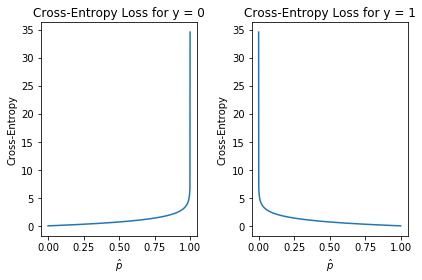

In [13]:
plot_cross_entropy()

Basically, the key thing to note is that the cost function penalizes confident and wrong predictions more than it rewards confident and right predictions! Now that we know the cost function that is mostly used for Logistic Regression let's now look at how a loss function can be minimized.

## Optimization: Gradient Descent

Now that you know the concept behind the cost function, you may be asking to yourself how we can minimize it. That is where gradient descent comes in! It is one of the most efficient optimization algorithms which attempts to find a local or global minima of a function. 

Gradient descent allows a machine learning model to learn the gradient (*aka* the direction) that the model should take in order to reduce errors and thus minimizing the cost function. In the Logistic Regression example, direction refers to how the model parameters $\beta_0$, $\beta_1$ and $\beta_2$ should be tweaked or corrected as to reduce the cost function. As the model iterates, it tends to a minimum where any further changes to the parameters produces little or any changes in the cost function. In such a case, it is said that it converged. We have an example below where we can see gradient descent in action.

<img src="https://cdn-images-1.medium.com/max/1600/1*ZmzSnV6xluGa42wtU7KYVA.gif" style="width: 400px;"/>

An alternative to gradient descent would be brute forcing a potentially infinite combination of parameters until the set of parameters that minimizes the cost is found. However, this is not feasible and, thus, gradient descent enables the learning process to make corrective updates to the learned estimates that move the model towards an optimal combination of parameters.

How interesting would it be to actually observe Logistic Regression do gradient descent and change its decision boundary? Let's do just that! Let's observe 25 iterations of gradient descent.

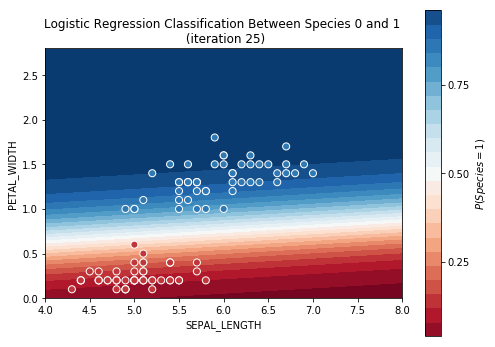

In [14]:
gradient_descent_classification_plot(X, Y, 25)

We can see that the decision boundary starts quite wide and somewhat horizontal and then starts to shrink and move between the two iris species!

Now you should be asking yourself how can you apply gradient descent to modify the model's parameters and minimize the cost function. For that, let's refresh our memory on how we can predict a probability only with an intercept $\beta_0$ and coefficient $\beta_1$. 

$$ \hat{p} = \frac{e^{\beta_0 + \beta_1 x_1}}{1 + e^{\beta_0 + \beta_1 x_1}}$$

This can be further simplified into

$$ \hat{p} = \frac{1.0}{1.0 + e^{(-(\beta_0 + \beta_1 x_1))}}$$

But wait! We still don't know what Gradient Descent really means! Basically, is it the process of minimizing a function by following the gradients of the cost function. This involves knowing the form of the cost as well as the derivative so that from a given point you know the gradient and can move in that direction, e.g. downhill towards the minimum value.

### Stochastic Gradient Descent

In machine learning, we can use a technique that evaluates and updates the coefficients every iteration called stochastic gradient descent to minimize the error of a model on our training data. The way this optimization algorithm works is that each training instance is shown to the model one at a time. The model makes a prediction for a training instance, the error is calculated and the model is updated in order to reduce the error for the next prediction. This procedure can be used to find the set of coefficients in a model that result in the smallest error for the model on the training data. Each iteration, the coefficients ($\beta$) in machine learning language are updated using the equation:

$$\beta_{t+1} = \beta_t - learning\_rate \frac{\partial H_{\hat{p}}(y)}{\partial \beta_t}$$

which we can simplify to

$$\beta_{t+1} = \beta_t + learning\_rate \left [(y - \hat{p}) \ \hat{p} \ (1 - \hat{p}) \ x \right]$$

where $learning\_rate$ is a learning rate that you must configure (*e.g*. 0.1). You think of learning rate as how big a step you want to take in each iteration. Small steps converge slower, while big steps are faster but might not converge. 

Exceptionally, the intercept is updated without an observation as it is not associated with a specific observation.

$$\beta_{0(t+1)} = \beta_{0(t)} - learning\_rate \frac{\partial H_{\hat{p}}(y)}{\partial \beta_{0(t)}}$$

which we can also simplify to

$$\beta_{0(t+1)} = \beta_{0(t)} + learning\_rate \left [(y - \hat{p}) \ \hat{p} \ (1 - \hat{p})\right]$$

It should be noted that the formulas were already simplified to leave most of the math out. If you run this iterative process many times, you should obtain the coefficients that converge to a minimum of the cost function and thus, your logistic regression model!

# Binary Classification

As you've noticed, we've been always doing classification between two distinct classes (in this case, iris species). Well, that is mostly because Logistic Regression can only classify between two distinct classes at a time. Such a classification task is called Binary Classification. However, there are strategies that can be used for classifying between multiple classes.

# Multiclass Classification

Multiclass or multinomial classification is the problem of classifying instances into one of three or more classes. We saw that the iris dataset contains data from three different species, so we already have data to play with multiclass classification!

There are some classification algorithms that can already handle multiclass classification out of the box, however binary algorithms just like Logistic Regression cannot. Thus, Logistic Regression has to step up its game and adopt new strategies!

<img src="http://i0.kym-cdn.com/entries/icons/original/000/023/987/overcome.jpg" style="width: 400px;"/>

## One-vs.-Rest

The One-vs.-Rest (*aka* OvR or One-vs.-All, OvA) strategy involves training a single classifier per unique class, which respective samples are considered as positive and all the remaining ones as negatives. So a classifier has to be trained once per existing class (three times for classifying iris species). This strategy works best if the classifiers output probabilities instead of discrete labels, else may result in ambiguities, where multiple classes are equally predicted for each observation.

Let's go through this strategy. Let $C$ be a binary learner algorithm, $f_c$ the list of classifiers, $X$ the observations, $K$ the number of classes and :

1. For each $k$ in ${1,...,K}$:
    * Train $C$ from $X$, with $k$ as the positive class and the rest as negatives;
    * Add $C$ to the list of classifiers $f_c$;
2. For each $C$ in $f_c$:
    * Obtain the predicted probability $\hat{p}$ from $C$ for its positive class for each observation of $X$;
3. The loop returns $K$ vectors with the predicted probabilities for each observation of $X$;
4. Label each observation with the positive class that had the highest predicted probability $$\hat{p} = \underset{k \in \{1,...,K\}}{argmax} \  f_c(x)$$

Let's see this in action.

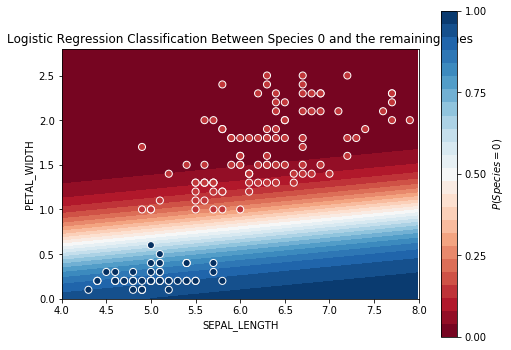

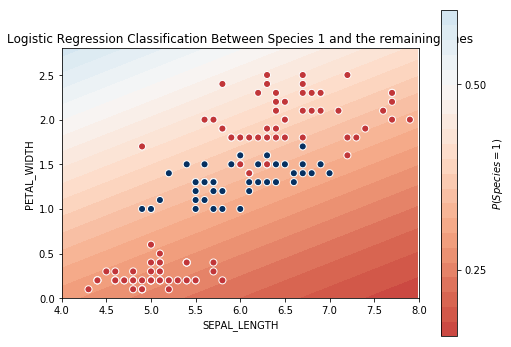

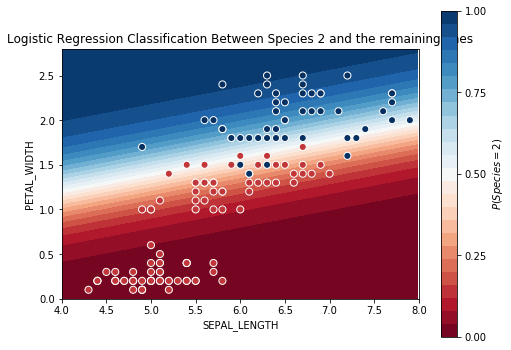

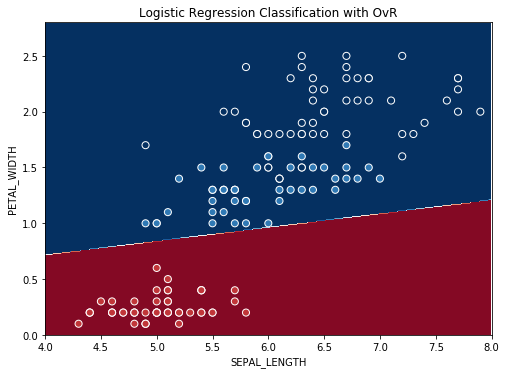

In [15]:
OvR_plot(X, Y)

Oh, this did not return all 3 species, but only 2! And we can see why in the second plot, when it tries to classify species 1. As it cannot be linearly separable with the other 2 species, the returned probabilities are all very low.

Despite being popular, this strategy suffers from several problems:
1. The scale of the probability values may differ from classifier to classifier;
2. Even if the training set has the same number of different classes (balanced classes), the binary classifiers would see unbalanced distributions, because the set of negatives is much larger than the set of positives.

## Multinomial Logistic Regression

Multinomial logistic regression is also a classification algorithm just like like the logistic regression for binary classification. But when it comes to multinomial logistic regression, the idea is to use the logistic regression techniques to predict the target class when there are more than 2. Thus, the main difference from the OvR strategy, is that we only need one classifier for multiclass classification.

The main technique will be same like the logistic regression for binary classification until calculating the probabilities for each target. Once the probabilities are calculated, we need to encode them and use the cross entropy methods in the training process for calculating the properly optimized weights.

This can go quite deep, so I'd advise looking at posts like these:
* http://dataaspirant.com/2017/03/14/multinomial-logistic-regression-model-works-machine-learning/
* http://blog.datumbox.com/machine-learning-tutorial-the-multinomial-logistic-regression-softmax-regression/

BUT it would be quite boring without looking at how well it would fare in classifying iris' species. So let's do multinomial logistic regression for the same problem as above and plot the results!

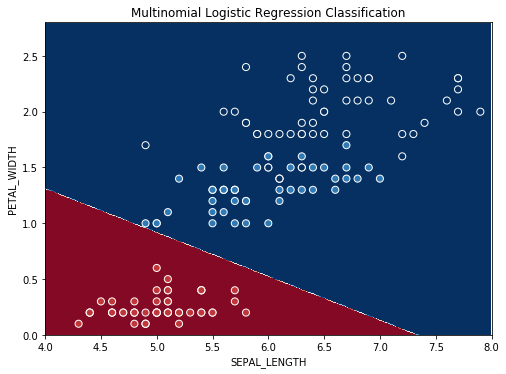

In [16]:
multinomial_plot(X,Y)

Awww we still could not classify Species 1. But that's because the classifier is linear. If you're sad that you couldn't compare them both, don't be! You can run the function below for a dummy example that I shamelessly took from sklearn documentation http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html.

training score : 0.995 (multinomial)
training score : 0.976 (ovr)


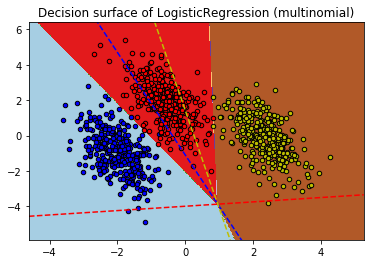

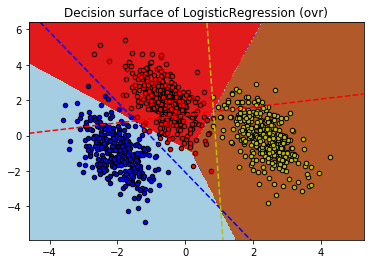

In [17]:
OvR_vs_multinomial_plot()

We can see that multinomial logistic regression was able to do better predictions than the OvR strategy.

Now you should feel awesome, because this notebook was quite heavy and introduced a lot of new, but very important concepts. Oh and now you should be quite comfortable with logistic regression and ready to visit some other interesting classifiers that can be non-linear and finally classify that pesky Species 1.

<img src="https://memecrunch.com/meme/9X9VM/logistic-regression-shawshank-redemption/image.jpg?w=1024&c=1" style="width: 400px;"/>

# Sklearn Logistic Regression

Fortunately there are already a lot of logistic regression implementations that are already quite computationally efficient. So, there's no need for you to code them from scratch. You can find two of those implementations in sklearn! You can import them this way:

In [25]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

### SGDClassifier

Let's start with the Logistict Regression implementation with stochastic gradient descent `SGDCLassifier`.

Now that you've loaded the algorithm, you need to first create the classifier object. We will set `random_state` to $0$ just to make sure we obtain the exact same results. To do Logistic Regression we also need to set the `loss` to "log", as this implementation is not exclusive for Logistict Regression.

Note that this implementation uses the OvR strategy, so it will train three different models in the background.

In [68]:
learning_rate = 0.001
learning_rate_schedule = 'constant'
n_epoch = 1000
loss = "log"

sgd_clf = SGDClassifier(random_state=0, 
                   loss=loss,
                   penalty=None, 
                   shuffle=True, 
                   learning_rate=learning_rate_schedule, 
                   eta0=learning_rate, 
                   max_iter=n_epoch)

Cool, now you just created the algorithm object that is ready to learn from some juicy data. Now you have to give it the input data $X$ as well as the corresponding labels $y$ so that it can train and converge to the optimal parameters.

In [67]:
sgd_clf.fit(X,Y)

/home/rodrigo/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty=None, power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)

And voilà! You just created your first logistic regression model. Now, it would be interesting to know how good the model is! And we can do so, by checking the percentage of correctly predicted observations on the data by doing the following.

In [55]:
sgd_clf.score(X, Y)

0.9733333333333334

Oh we were right 97% of the time, not bad! What if we want to get the predictions for each sample instead of the score?

In [56]:
preds = sgd_clf.predict(X)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Great! These are the `argmax` of the predicted probabilities of each classifier created for the OvR strategy. However, it would be far more interesting to obtain and observe the probabilities given by each classifier! We can do it this way.

In [57]:
probas = sgd_clf.predict_proba(X)
probas[:10]

array([[8.99156506e-01, 1.00843390e-01, 1.03710153e-07],
       [8.09576715e-01, 1.90422825e-01, 4.60085285e-07],
       [8.73863196e-01, 1.26136441e-01, 3.63274140e-07],
       [8.46432996e-01, 1.53565855e-01, 1.14865841e-06],
       [9.18898537e-01, 8.11013541e-02, 1.08489052e-07],
       [9.48719435e-01, 5.12804387e-02, 1.26460486e-07],
       [9.21081319e-01, 7.89180468e-02, 6.34017487e-07],
       [8.81796812e-01, 1.18202957e-01, 2.31392335e-07],
       [8.22381132e-01, 1.77616884e-01, 1.98380408e-06],
       [8.04326383e-01, 1.95673247e-01, 3.70860093e-07]])

And then we can do whatever we want with the predicted probabilities!

What if we wanted to obtain the obtained coefficients for each of the three logistic regressions (remember that we're using OvR)?

In [58]:
coefficients = sgd_clf.coef_
coefficients

array([[ 0.58148148,  1.97478015, -3.09075378, -1.40900919],
       [ 0.63969929, -2.01562687,  0.62498169, -1.83625912],
       [-2.43798228, -2.20005396,  3.55513924,  3.44282006]])

The algorithm has a lot more arguments that you can change to modify its behaviour as well as other methods that you can explore. Feel free to explore them here: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

### Logistic Regression

Let's now use with the Logistict Regression implementation with other optimization methods `Logistic Regression`.

Now that you've loaded the algorithm, you need to first create the classifier object. We will set `random_state` to $0$ just to make sure we obtain the exact same results. Additionally, let's do the OvR multinomial classification strategy.

In [59]:
logreg_clf = LogisticRegression(random_state=0, multi_class='ovr')

Cool, now you just created the algorithm object that is ready to learn from some juicy data. Now you have to give it the input data $X$ as well as the corresponding labels $y$ so that it can train and converge to the optimal parameters.

In [60]:
logreg_clf.fit(X,Y)

/home/rodrigo/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

And voilà! You just created your first logistic regression model. Now, it would be interesting to know how good the model is! And we can do so, by checking the percentage of correctly predicted observations on the data by doing the following.

In [61]:
logreg_clf.score(X, Y)

0.96

Oh we were right 96% of the time, not bad! What if we want to get the predictions for each sample instead of the score?

In [62]:
preds = logreg_clf.predict(X)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Great! Let's also obtain and observe the probabilities given by each classifier!

In [63]:
probas = logreg_clf.predict_proba(X)
probas[:10]

array([[8.79681649e-01, 1.20307538e-01, 1.08131372e-05],
       [7.99706325e-01, 2.00263292e-01, 3.03825365e-05],
       [8.53796795e-01, 1.46177302e-01, 2.59031285e-05],
       [8.25383127e-01, 1.74558937e-01, 5.79356669e-05],
       [8.97323628e-01, 1.02665167e-01, 1.12050036e-05],
       [9.26986574e-01, 7.30004562e-02, 1.29693872e-05],
       [8.95064974e-01, 1.04895775e-01, 3.92506205e-05],
       [8.61839691e-01, 1.38141399e-01, 1.89095833e-05],
       [8.03156719e-01, 1.96758495e-01, 8.47861140e-05],
       [7.95421554e-01, 2.04552763e-01, 2.56832240e-05]])

What if we wanted to obtain the obtained coefficients for each of the three logistic regressions (remember that we're using OvR)?

In [64]:
coefficients = logreg_clf.coef_
coefficients

array([[ 0.41498833,  1.46129739, -2.26214118, -1.0290951 ],
       [ 0.41663969, -1.60083319,  0.57765763, -1.38553843],
       [-1.70752515, -1.53426834,  2.47097168,  2.55538211]])

The algorithm has a lot more arguments that you can change to modify its behaviour as well as other methods that you can explore. Feel free to explore them here: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html